# **CS5783 - Assignment 4 -- Naive Bayes, Decision Trees, kNNs**

**Question 1- Part 1: PLease refer to the Q1.pdf**

## **Question 1.2**

In [ ]:
#importing necessary libraries
import pandas as pd
import math
import statistics as s
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from operator import itemgetter
import random

In [ ]:
# reading the file
data = pd.read_excel("/content/drive/MyDrive/Asssignment4_Data.xlsx")
data.sort_values(by=['Construction type'], inplace=True)
data.reset_index()
data.head(50)

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,Apartment
16,17,8.2464,1.5,5.1500,1.664,2.0,8,4,50,Apartment
14,15,5.0500,1.0,5.0000,1.020,0.0,5,2,46,Apartment
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,Apartment
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14,Apartment
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,Apartment
19,20,9.0384,1.0,7.8000,1.500,1.5,7,3,23,Apartment
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,Condo
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,Condo
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,Condo


In [ ]:
houseData = data[13:]
condoData = data[7:13]
apartmentData = data[:7]
print(data.columns)

Index(['House ID', 'Local Price', 'Bathrooms', 'Land Area', 'Living area',
       '# Garages', '# Rooms', '# Bedrooms', 'Age of home',
       'Construction type'],
      dtype='object')


In [ ]:
colname ="Age of home"
aptdata = apartmentData[colname].tolist()
print(len(aptdata), "\t", aptdata, "\t", s.mean(aptdata), "\t", s.variance(aptdata), "\t",s.stdev(aptdata))
condata = condoData[colname].tolist()
print(len(condata), "\t", condata, "\t", s.mean(condata), "\t", s.variance(condata), "\t", s.stdev(condata))
hodata = houseData[colname].tolist()
print(len(hodata), "\t", hodata, "\t", s.mean(hodata), "\t", s.variance(hodata), "\t", s.stdev(hodata))

7 	 [42, 50, 46, 42, 14, 54, 23] 	 38.714285714285715 	 215.57142857142858 	 14.682350921137548
6 	 [56, 51, 42, 17, 32, 40] 	 39.666666666666664 	 194.66666666666666 	 13.9522996909709
7 	 [32, 32, 30, 30, 32, 62, 22] 	 34.285714285714285 	 161.90476190476193 	 12.724180205607036


In [ ]:
# Occurance of each class
apt_probab = len(aptdata)/20
condo_probab = len(condata)/20
house_probab = len(hodata)/20

print("apt_probab: ", apt_probab)
print("condo_probab: ", condo_probab)
print("house_probab: ",house_probab)

apt_probab:  0.35
condo_probab:  0.3
house_probab:  0.35


In [ ]:
# Loading the test data
test_data = pd.read_excel("/content/drive/MyDrive/Asssignment4_Data.xlsx", "Test")
test_data.head()

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,24,6.0931,1.5,6.7265,1.652,1.0,6,3,44,Apartment
1,25,8.3607,1.5,9.1500,1.777,2.0,8,4,48,House
2,26,8.1400,1.0,8.0000,1.504,2.0,7,3,3,House
3,27,9.1416,1.5,7.3262,1.831,1.5,8,4,31,Apartment
4,28,12.0000,1.5,5.0000,1.200,2.0,6,3,30,Apartment


Hard coding the Conditional probabilities calculated in the previous part by hand.

In [ ]:
# Local Price
p_LP_A = [0.104, 0.106, 0.107, 0.097, 0.047]
p_LP_C = [0.083, 0.084, 0.085, 0.080, 0.52]
p_LP_H = [0.5, 0.000021, 0.0001, 0, 0]

#Land Area
p_LandA_A = [0.120, 0.07, 0.103, 0.114, 0.115]
p_LandA_C = [0.15, 0.07, 0.116, 0.137, 0.144]
p_LandA_H = [0.17, 0.09, 0.14, 0.16, 0.13]

#Bathroom
p_Bath_A = [0.65, 0.65, 0.62, 0.65, 0.65]
p_Bath_C = [0.63, 0.63, 0.57, 0.63, 0.63]
p_Bath_H = [0.155, 0.155, 1.97, 0.155, 0.155]

#Living Area
p_LivingA_A = [0.55, 0.52, 0.56, 0.5, 0.51]
p_LivingA_C = [0.429, 0.419, 0.431, 0.413, 0.401]
p_LivingA_H = [0.88, 0.35, 1.63, 0.21, 1.25]

#Garages
p_G_A = [0.552, 0.3, 0.3, 0.529, 0.3]
p_G_C = [0.63, 0.33, 0.33, 0.73, 0.33]
p_G_H = [0.47, 0.25, 0.25, 0.42, 0.25]

#Rooms 6 8 7 8 6
p_R_A = [0.24, 0.20, 0.29, 0.20, 0.24]
p_R_C = [0.21, 0.19, 0.24, 0.19, 0.21]
p_R_H = [0.56, 0.015, 0.26, 0.015, 0.56]

#Bedroom
p_Bed_A = [0.37, 0.34, 0.37, 0.34, 0.37]
p_Bed_C = [0.45, 0.34, 0.45, 0.34, 0.45]
p_Bed_H = [0.69, 0.15, 0.69, 0.15, 0.69]

#Age of Home
p_Age_A = [0.025, 0.022, 0.001, 0.023, 0.022]
p_Age_C = [0.027, 0.023, 0.0009, 0.02, 0.022]
p_Age_H = [0.023, 0.17, 0.0015, 0.03, 0.029]

Probabilities of each class as well as the final classification based on the MAP rule

In [ ]:
MAP_classify = []
for i in range(0, 5):
  probab_Apartment = p_LP_A[i] * p_LandA_A[i] * p_Bath_A[i] * p_LivingA_A[i] * p_G_A[i] * p_R_A[i] * p_Bed_A[i] * p_Age_A[i] * apt_probab
  probab_Condo = p_LP_C[i] * p_LandA_C[i] * p_Bath_C[i] * p_LivingA_C[i] * p_G_C[i] * p_R_C[i] * p_Bed_C[i] * p_Age_C[i] * condo_probab
  probab_House = p_LP_H[i] * p_LandA_H[i] * p_Bath_H[i] * p_LivingA_H[i] * p_G_H[i] * p_R_H[i] * p_Bed_H[i] * p_Age_H[i] * house_probab
  lst = []
  lst.append(probab_Apartment)
  lst.append(probab_Condo)
  lst.append(probab_House)
  MAP_classify.append(lst)

misclassify = 0
for i in range(0, 5):
  probab = MAP_classify[i]
  clss = ""
  if np.argmax(MAP_classify[i]) == 0:
    clss = "APARTMENT"
    print(clss, MAP_classify[i], probab[np.argmax(MAP_classify[i])])
  if np.argmax(MAP_classify[i]) == 1:
    clss = "CONDO"
    print(clss, MAP_classify[i], probab[np.argmax(MAP_classify[i])])
  if np.argmax(MAP_classify[i]) == 2:
    clss = "HOUSE"
    print(clss, MAP_classify[i], probab[np.argmax(MAP_classify[i])])
  if clss.lower() != (test_data["Construction type"].tolist()[i]).lower():
    misclassify += 1 
print("Misclassified: ", misclassify, "Correct: ", 5-misclassify) 

HOUSE [1.9135980864e-06, 1.6226489381602497e-06, 1.6949783373599997e-05] 1.6949783373599997e-05
APARTMENT [3.939503568e-07, 2.2831132112712004e-07, 3.431634609374999e-12] 3.939503568e-07
APARTMENT [4.311116310479999e-08, 2.3309368101359998e-08, 1.05853108725e-09] 4.311116310479999e-08
APARTMENT [1.04068767621e-06, 8.068778317152001e-07, 0.0] 1.04068767621e-06
CONDO [3.675396324599999e-07, 3.8935023551424e-06, 0.0] 3.8935023551424e-06
Misclassified:  4 Correct:  1


We observe that the Local price feature has two zero values in its probability for the class House. By ignoring this feature we should be able to get better classification. 

In [ ]:
# MAP classification by ignoring the local price feature.
MAP_classify = []
for i in range(0, 5):
  probab_Apartment = p_LandA_A[i] * p_Bath_A[i] * p_LivingA_A[i] * p_G_A[i] * p_R_A[i] * p_Bed_A[i] * p_Age_A[i] * apt_probab
  probab_Condo = p_LandA_C[i] * p_Bath_C[i] * p_LivingA_C[i] * p_G_C[i] * p_R_C[i] * p_Bed_C[i] * p_Age_C[i] * condo_probab
  probab_House = p_LandA_H[i] * p_Bath_H[i] * p_LivingA_H[i] * p_G_H[i] * p_R_H[i] * p_Bed_H[i] * p_Age_H[i] * house_probab
  lst = []
  lst.append(probab_Apartment)
  lst.append(probab_Condo)
  lst.append(probab_House)
  MAP_classify.append(lst)

misclassify = 0
for i in range(0, 5):
  probab = MAP_classify[i]
  clss = ""
  if np.argmax(MAP_classify[i]) == 0:
    clss = "APARTMENT"
    print(clss, MAP_classify[i], probab[np.argmax(MAP_classify[i])])
  if np.argmax(MAP_classify[i]) == 1:
    clss = "CONDO"
    print(clss, MAP_classify[i], probab[np.argmax(MAP_classify[i])])
  if np.argmax(MAP_classify[i]) == 2:
    clss = "HOUSE"
    print(clss, MAP_classify[i], probab[np.argmax(MAP_classify[i])])
  if clss.lower() != (test_data["Construction type"].tolist()[i]).lower():
    misclassify += 1 
print("Misclassified: ", misclassify, "Correct: ", 5-misclassify)

HOUSE [1.83999816e-05, 1.954998720675e-05, 3.3899566747199994e-05] 3.3899566747199994e-05
APARTMENT [3.7165128000000006e-06, 2.7179919181800006e-06, 1.6341117187499998e-07] 3.7165128000000006e-06
HOUSE [4.029080664e-07, 2.74227860016e-07, 1.0585310872500002e-05] 1.0585310872500002e-05
APARTMENT [1.0728738930000002e-05, 1.0085972896440001e-05, 5.167637999999998e-08] 1.0728738930000002e-05
HOUSE [7.81999218e-06, 7.487504529119999e-06, 2.4696091875000008e-05] 2.4696091875000008e-05
Misclassified:  3 Correct:  2


## **Question 2**

In [ ]:
train_data = pd.read_excel("/content/drive/MyDrive/Asssignment4_Data.xlsx", "Train")
train_data.columns

x_train = train_data[['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']]
y_train = train_data['Construction type']
x_test = test_data[['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']]
y_test = test_data['Construction type']

In [ ]:
d_tree = DT()
d_tree.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'Age of home <= 36.0\ngini = 0.665\nsamples = 20\nvalue = [7, 6, 7]\nclass = Apartment'),
 Text(0.3, 0.75, 'Local Price <= 8.411\ngini = 0.56\nsamples = 10\nvalue = [2, 2, 6]\nclass = House'),
 Text(0.2, 0.5833333333333334, 'Age of home <= 19.5\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]\nclass = House'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Condo'),
 Text(0.3, 0.4166666666666667, 'Living area <= 1.173\ngini = 0.245\nsamples = 7\nvalue = [0, 1, 6]\nclass = House'),
 Text(0.2, 0.25, '# Bedrooms <= 2.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Condo'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = House'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Condo'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]\nclass = House'),
 Text(0.4, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = A

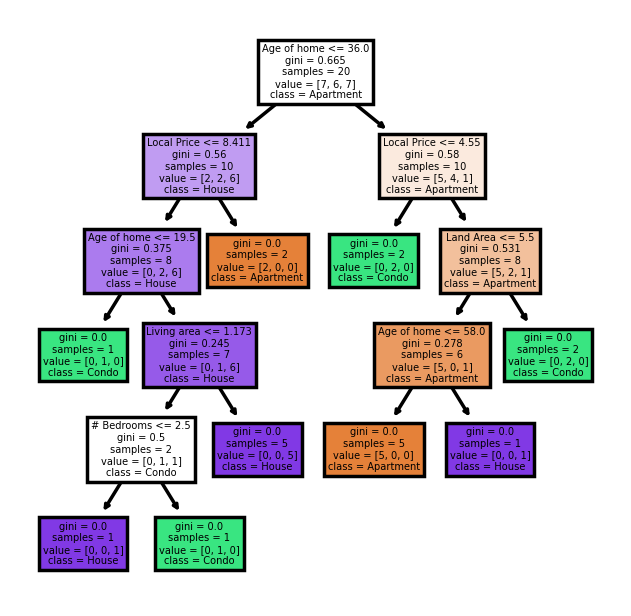

In [ ]:
features= ['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']
classes = ['Apartment', 'Condo', 'House']
plt.subplots(figsize = (3, 3), dpi=250)
tree.plot_tree(d_tree,feature_names = features, class_names = classes, filled=True)

**Q2. Part 1a**
<Br>Accuracy on training set

In [ ]:
train_accuracy = d_tree.score(x_train, y_train)
print("Training Accuracy: ", train_accuracy*100,"%")

Training Accuracy:  100.0 %


**Q2. Part 1b**
<Br>Accuracy on test set

In [ ]:
test_accuracy = d_tree.score(x_test, y_test)
print("Test Accuracy: ", test_accuracy*100,"%")

Test Accuracy:  40.0 %


**Q2. Part 2**
<Br>Checking the effect of restricting the maximum depth of the tree by trying different depths and finding the best value. 

In [ ]:
lst_train_acc = []
lst_test_acc = []
for depth in range(1, 12):
  new_DT = DT(max_depth = depth)
  new_DT.fit(x_train, y_train)
  tr_acc = new_DT.score(x_train, y_train)
  tst_acc = new_DT.score(x_test, y_test)
  lst_train_acc.append(tr_acc)
  lst_test_acc.append(tst_acc)
  print("Depth", depth, "\tTraining Accuracy: ", tr_acc*100, "%\tTest Accuracy: ", tst_acc)

Depth 1 	Training Accuracy:  55.00000000000001 %	Test Accuracy:  0.4
Depth 2 	Training Accuracy:  75.0 %	Test Accuracy:  0.6
Depth 3 	Training Accuracy:  90.0 %	Test Accuracy:  0.4
Depth 4 	Training Accuracy:  95.0 %	Test Accuracy:  0.4
Depth 5 	Training Accuracy:  100.0 %	Test Accuracy:  0.4
Depth 6 	Training Accuracy:  100.0 %	Test Accuracy:  0.4
Depth 7 	Training Accuracy:  100.0 %	Test Accuracy:  0.4
Depth 8 	Training Accuracy:  100.0 %	Test Accuracy:  0.4
Depth 9 	Training Accuracy:  100.0 %	Test Accuracy:  0.4
Depth 10 	Training Accuracy:  100.0 %	Test Accuracy:  0.4
Depth 11 	Training Accuracy:  100.0 %	Test Accuracy:  0.4


Text(0.5, 1.0, 'Accuracy vs Depths')

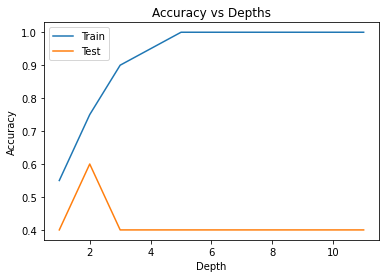

In [ ]:
plt.plot(range(1,12), lst_train_acc, label='Train')
plt.plot(range(1,12), lst_test_acc, label='Test')
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs Depths")

For the test data set we get a max accuracy of 60% for a depth of 2.

**Q2-Part 3**
<Br>The depth of the tree determines how the tree is constructed. Additionally, it displays the longest possible path from the root to the leaf node. The complexity rises as we descend further into the tree, which makes categorization more difficult and increases the possibility of classification errors. The graph above shows that we have the best accuracy on the test data set at a depth of 2, which is roughly 60%.

**Q2- Part4**
<Br>Visualising  the tree for the best performance on test set.

[Text(0.5, 0.9166666666666666, 'Age of home <= 36.0\ngini = 0.665\nsamples = 20\nvalue = [7, 6, 7]\nclass = Apartment'),
 Text(0.3, 0.75, 'Local Price <= 8.411\ngini = 0.56\nsamples = 10\nvalue = [2, 2, 6]\nclass = House'),
 Text(0.2, 0.5833333333333334, 'Age of home <= 19.5\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]\nclass = House'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Condo'),
 Text(0.3, 0.4166666666666667, 'Living area <= 1.173\ngini = 0.245\nsamples = 7\nvalue = [0, 1, 6]\nclass = House'),
 Text(0.2, 0.25, '# Bedrooms <= 2.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Condo'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = House'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Condo'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]\nclass = House'),
 Text(0.4, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = A

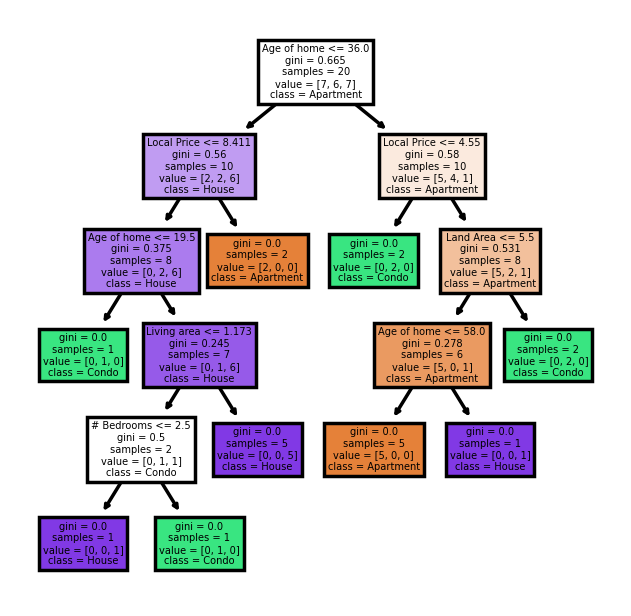

In [ ]:
dt_depth2 = DT(max_depth=2)
dt_depth2.fit(x_train, y_train)
features= ['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']
classes = ['Apartment', 'Condo', 'House']
plt.subplots(figsize = (3, 3), dpi=250)
tree.plot_tree(d_tree,feature_names = features, class_names = classes, filled=True)

Classification for the given values of the features by folllowing the tree manually.

Inference from tree: We begin by checking if Home is <=36 years old. If it is, move to the node's left leaf. Then, we will verify if the local price is greater than 8.411, . In this case, we will move to the right node of the tree and we reach the end because there are no more leaf nodes. And our classification is **"Apartment"**.

Predicting based on feature values using the library.

In [ ]:
prediction = dt_depth2.predict([[9.0384,1,7.8,1.5,1.5,7,3,23]])
print("Predicted Class: ", prediction)

Predicted Class:  ['Apartment']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
test_accuracy = dt_depth2.score(x_test, y_test)
print("Test Accuracy: ", test_accuracy*100,"%")

Test Accuracy:  60.0 %


## **Question 3**

Methodology followed: Find the Euclidean distance between each row in the test data set and every row in the training data set. Then, based on the provided K value, determine the number of neighbors, and see which class pops up the most frequently among them.Lastly, determine the accuracy based on the number of correctly classified points.

In [ ]:
train_data = pd.read_excel("/content/Asssignment4_Data.xlsx", "Train")
test_data = pd.read_excel("/content/Asssignment4_Data.xlsx", "Test")

x_train = train_data[['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']]
x_train_lst = x_train.values.tolist()
y_train = train_data['Construction type'].tolist()
x_test = test_data[['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']]
x_test_lst = x_test.values.tolist()
y_test = test_data['Construction type'].tolist()

In [ ]:
def calculate_euclidean_distance_for_N_neighbours(point1, training_lst, no_neighbours):
  dist_lst = []
  row_num = 0
  for j in training_lst:
    d = 0
    for i in range(0, 8):
      d = d + (point1[i] - j[i])**2
    dist_lst.append([row_num, math.sqrt(d), y_train[row_num]])
    row_num += 1
  dist_lst = sorted(dist_lst, key=itemgetter(1), reverse=False)
  return dist_lst[0:no_neighbours]

In [ ]:
def get_class(most_closest_pt):
  apt, condo, house = 0, 0, 0
  for i in range(len(most_closest_pt)):
    if most_closest_pt[i][2].lower() == "Apartment".lower():
      apt += 1
    if most_closest_pt[i][2].lower() == "Condo".lower():
      condo += 1
    if most_closest_pt[i][2].lower() == "House".lower():
      house += 1
  if apt > condo and apt > house:
    return "APARTMENT"  
  elif house > condo and house > apt:
    return "HOUSE"
  elif condo > apt and condo > house:
    return "CONDO"
  elif condo == apt and apt == house:
    return random.choice(["APARTMENT", "HOUSE", "CONDO"])
  elif condo == apt:
    return random.choice(["APARTMENT", "CONDO"])
  elif apt == house:
    return random.choice(["APARTMENT", "HOUSE"])
  elif condo == house:
    return random.choice(["HOUSE", "CONDO"])
  

In [ ]:
def predict_class(test_point, traning_set, no_neighbour):
  most_closest_pt = calculate_euclidean_distance_for_N_neighbours(test_point, traning_set, no_neighbour)
  #print(most_closest_pt)
  class_predicted = get_class(most_closest_pt)
  return class_predicted

In [ ]:
def evaluate(x_train_lst, x_test_lst, y_train, y_test, neighbours):
  accuracy = 0
  correct_classified = 0
  misclassified = 0
  for i in range(len(x_test_lst)):
    predicted = predict_class(x_test_lst[i], x_train_lst, neighbours)
    if predicted.lower() == y_test[i].lower():
      correct_classified += 1
    elif predicted.lower() != y_test[i].lower():
      misclassified += 1
    accuracy=correct_classified/len(x_test_lst)
    #print(correct_classified/len(x_test_lst))
  return accuracy

In [72]:
acc_list= []
k_list = []
for i in range(0, 10):
  acc = evaluate(x_train_lst, x_test_lst, y_train, y_test, i)
  acc_list.append(acc)
  k_list.append(i)
print(k_list)
print(acc_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.4, 0.4]


Text(0.5, 1.0, 'Accuracy vs K values')

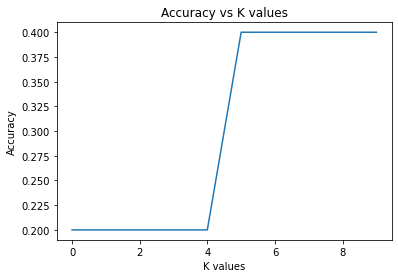

In [73]:
plt.plot(k_list, acc_list)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K values")

The k value controls the amount of data points which are taken into account. Increasing k typically decreases variance and increases bias.
<Br>The model gets overly specific and struggles to generalize if k is chosen to be too low (less than 4 in this case). It also has a tendency to be noise-sensitive. The model achieves a high level of accuracy on the train set but will perform poorly as a predictor for fresh, unforeseen data points. Consequently, we are likely to produce an overfit model.
The model gets overly generalized and is unable to correctly predict the data points in both the train and test sets if k is chosen to be too large. Underfitting is the term for this circumstance.

KNN implementation using sklearn library

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=6)
knn1.fit(x_train, y_train)
predict1 = knn1.predict(x_test)
test_accuracy = knn1.score(x_test, y_test)
print("Test Accuracy: ", test_accuracy*100,"%")

Test Accuracy:  40.0 %


In [77]:
from sklearn.model_selection import GridSearchCV
knn = GridSearchCV(
     estimator = KNeighborsClassifier(),
     param_grid = {'n_neighbors': np.arange(1,6)},
     scoring='neg_log_loss',
     cv = 5
)

In [78]:
knn.fit(x_train,y_train)
scores = pd.Series(abs(knn.cv_results_['mean_test_score']))
scores.index = np.arange(1,6)

Text(0.5, 1.0, 'Log loss of knn with k vales from 1 to 5')

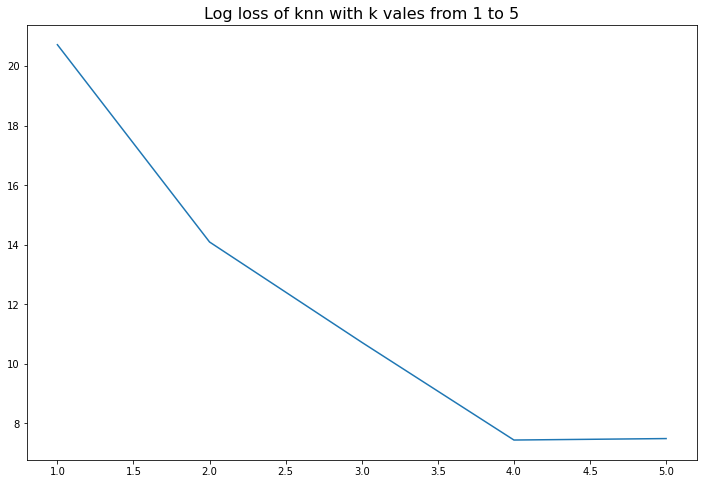

In [79]:
scores.plot(figsize=(12,8))
plt.title("Log loss vs k vales", fontsize=16)

Value of log loss stabalizes after k=4.